***
# Logistic Regression (Perceptron Trick)

* **Equation :-**
1. Ax + By + C = 0
2. AX1 + BX2 + C = 0

 - AX1 + BX2 + C > 0  (X1,X2 = Positive Region)
 - AX1 + BX2 + C < 0  (X1,X2 = Negative Region)

 * When we change in C :- line change position up and doen.
 * When we change in A :- Line rotation at Y-axis point.
 * When we change in B :- Line rotation at X-axis point.

  **1. (X1, X2 = 4, 5) in positive region, now we Transformation in negative region.**
  - Equation is 2X1 + 3X2 + 5 = 0. 
  - now subtract with {(2, 3, 5) - (4, 5, 1)} = (-2, -2, 4)
  - This one (-2X1 + -2X2 + 4 = 0) is new line and now (4, 5) is in negative region.
  
 **2. (X1, X2 = 1, 3) in negative region, now we Transformation in positive region.**
  - Equation is 2X1 + 3X2 + 5 = 0. 
  - now addition  {(2, 3, 5) + (1, 3, 1)} = (3, 6, 6)
  - This one ( 3X1 + 6X2 + 6 = 0) is new line and now (1, 3) is in positive region.
  
  

***

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
X, Y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [2]:
X

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [3]:
Y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [4]:
import matplotlib.pyplot as plt

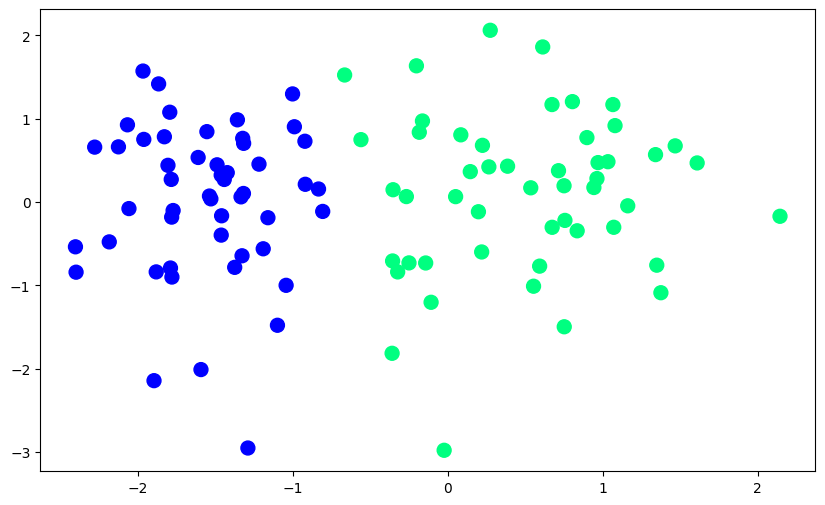

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=Y, cmap="winter", s=100)


In [6]:
def perceptron(X, Y):
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(Y[j]-y_hat)*X[j]
    
    return weights[0], weights[1:]

In [7]:
def step(z):
    return 1 if z>0 else 0

In [8]:
intercept_,coef_ = perceptron(X, Y)

In [9]:
print(intercept_)  # W0
print(coef_)       #W1, W2

1.0
[1.23992029 0.09046192]


***
* Ax + By + C = 0
* y = mx +c
* m = -(A/B)
* c = -(C/B)
***

In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 2.0)

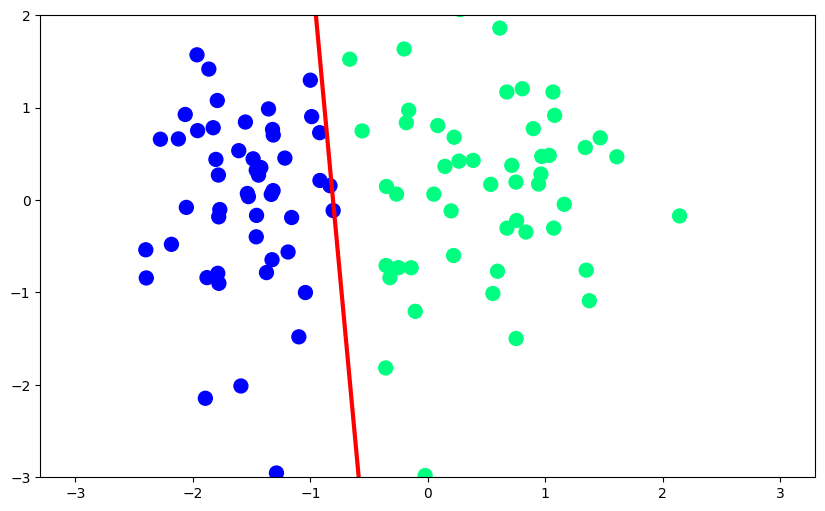

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1],c=Y, cmap="winter", s=100 )
plt.ylim(-3,2)